In [10]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import sys
import seaborn as sns
from scipy.special import comb
from matplotlib.colors import LogNorm
from matplotlib.patches import Patch
import matplotlib as mpl
import matplotlib.lines as lines

plt.rcParams.update({'font.size': 7})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'xtick.labelsize': 7})
plt.rcParams.update({'ytick.labelsize': 7})

sns.set_style("ticks")
plt.rcParams['scatter.edgecolors'] = 'black'
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5



In [11]:
# set some things
num_muts_total = 16

num_mutations_H1 = 16
order_H1 = 5
num_term_list_H1 = np.array([int(comb(num_mutations_H1,i)) for i in range(1,order_H1+1)])
total_params_H1 = sum(num_term_list_H1)
order_start_indices_H1 = list(np.cumsum(num_term_list_H1)+1)
order_start_indices_H1.insert(0,1)
print(num_term_list_H1,total_params_H1)
print(order_start_indices_H1)

num_mutations_H3 = 13
order_H3 = 4
num_term_list_H3 = np.array([int(comb(num_mutations_H3,i)) for i in range(1,order_H3+1)])
total_params_H3 = sum(num_term_list_H3)
order_start_indices_H3 = list(np.cumsum(num_term_list_H3)+1)
order_start_indices_H3.insert(0,1)
print(num_term_list_H3,total_params_H3)
print(order_start_indices_H3)

num_mutations_B = 8
order_B = 1
num_term_list_B = np.array([int(comb(num_mutations_B,i)) for i in range(1,order_B+1)])
total_params_B = sum(num_term_list_H3)
order_start_indices_B = list(np.cumsum(num_term_list_B)+1)
order_start_indices_B.insert(0,1)
print(num_term_list_B,total_params_B)
print(order_start_indices_B)


mut_names = ['30','35','36','57','64','65','66','79','82','83','84','85','92','95','103','113']

H1_color = '#e8735c'
H3_color = '#72c2a6'
B_color = '#5482a7'

ep_type = 'stat'

[  16  120  560 1820 4368] 6884
[1, 17, 137, 697, 2517, 6885]
[ 13  78 286 715] 1092
[1, 14, 92, 378, 1093]
[8] 1092
[1, 9]


In [13]:
# read first and second order effects for H1
first_coefs_H1 = np.zeros(num_muts_total)
first_coefs_H1_stderr = np.zeros(num_muts_total)
first_coefs_H1_ci = np.zeros((num_muts_total,2))
second_coefs_H1_matrix = np.zeros((num_muts_total,num_muts_total))
second_coefs_H1_matrix_sigmask = np.zeros((num_muts_total,num_muts_total))
 
with open('../../../CR9114/Epistasis_linear_models/model_coefs/H1_'+str(order_H1)+'order_'+ep_type+'.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    num_params = int(next(coef_reader)[-1])
    r2_train = float(next(coef_reader)[-1])
    header = next(coef_reader)
    intercept = next(coef_reader)
    for i in range(num_term_list_H1[0]):
        row = next(coef_reader)
        index = int(row[0])-1
        first_coefs_H1[index] = float(row[1])
        first_coefs_H1_stderr[index] = float(row[2])
        first_coefs_H1_ci[index,:] = [float(row[4]),float(row[5])]
    for i in range(num_term_list_H1[1]):
        row = next(coef_reader)
        i1,i2 = row[0].split(',')
        index1 = int(i1)-1
        index2 = int(i2)-1
        second_coefs_H1_matrix[index1][index2] = float(row[1])
        second_coefs_H1_matrix[index2][index1] = float(row[1])
        if float(row[4])*float(row[5]) > 0.0:
            second_coefs_H1_matrix_sigmask[index1][index2] = float(row[1])
            second_coefs_H1_matrix_sigmask[index2][index1] = float(row[1])
        
    readfile.close()

print(first_coefs_H1)

[-0.08731554  0.00814752  0.0235626   0.20909079  0.03003236 -0.02053125
 -0.07237194  0.00361167  0.22876592  0.40912309  0.0054135   0.00268782
  0.00245499  0.00455819 -0.00543652 -0.0009135 ]


In [21]:
# read H3 effects - 4th order model
first_coefs_H3 = np.full(num_muts_total,1.4)
first_coefs_H3_stderr = np.zeros(num_muts_total)
first_coefs_H3_ci = np.zeros((num_muts_total,2))
second_coefs_H3_matrix = np.full((num_muts_total,num_muts_total),np.nan)
second_coefs_H3_matrix_sigmask = np.full((num_muts_total,num_muts_total),np.nan)
for i in range(num_mutations_H1):
    second_coefs_H3_matrix[i,i] = 0.0
    second_coefs_H3_matrix_sigmask[i,i] = 0.0

 
with open('../../../CR9114/Epistasis_linear_models/model_coefs/H3_'+str(order_H3)+'order_'+ep_type+'.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    num_params = int(next(coef_reader)[-1])
    r2_train = float(next(coef_reader)[-1])
    header = next(coef_reader)
    intercept = next(coef_reader)
    for i in range(num_term_list_H3[0]):
        row = next(coef_reader)
        index = int(row[0])-1
        first_coefs_H3[index] = float(row[1])
        first_coefs_H3_stderr[index] = float(row[2])
        first_coefs_H3_ci[index,:] = [float(row[4]),float(row[5])]
    for i in range(num_term_list_H3[1]):
        row = next(coef_reader)
        i1,i2 = row[0].split(',')
        index1 = int(i1)-1
        index2 = int(i2)-1
        second_coefs_H3_matrix[index1][index2] = float(row[1])
        second_coefs_H3_matrix[index2][index1] = float(row[1])

        if float(row[4])*float(row[5]) > 0.0:
            second_coefs_H3_matrix_sigmask[index1][index2] = float(row[1])
            second_coefs_H3_matrix_sigmask[index2][index1] = float(row[1])
        else:
            second_coefs_H3_matrix_sigmask[index1][index2] = 0.0
            second_coefs_H3_matrix_sigmask[index2][index1] = 0.0
            
        
    readfile.close()

print(first_coefs_H3)

[ 0.1230792   0.26799132  0.22533555  1.4         0.34300799  0.19349639
 -0.19951511  0.01643926  1.4         1.4         0.05256241  0.06420417
  0.01829209  0.04726265 -0.02158381  0.09484796]


In [15]:
# read first order effects for FluB
first_coefs_B = np.full(num_muts_total,1.4)
first_coefs_B_stderr = np.zeros(num_muts_total)
first_coefs_B_ci = np.zeros((num_muts_total,2))
 
with open('../../../CR9114/Epistasis_linear_models/model_coefs/B_'+str(order_B)+'order_'+ep_type+'.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    num_params = int(next(coef_reader)[-1])
    r2_train = float(next(coef_reader)[-1])
    header = next(coef_reader)
    intercept = next(coef_reader)
    for i in range(num_term_list_B[0]):
        row = next(coef_reader)
        index = int(row[0])-1
        first_coefs_B[index] = float(row[1])
        first_coefs_B_stderr[index] = float(row[2])
        first_coefs_B_ci[index,:] = [float(row[4]),float(row[5])]
        
    readfile.close()

print(first_coefs_B)

[ 1.4        -0.15855831  1.4         1.4         1.4         1.4
  0.0137455   0.06508717  1.4         1.4        -0.09956377  1.4
  0.05987837  0.00968433 -0.05005663  0.6152546 ]


## plot first order effects

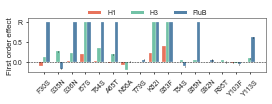

In [17]:
full_mut_names = ['F30S','S35N','S36N','I57S','T64S','A65T','N66A','T79S','K82I','S83F','T84S','S85N','S92N','R95T','Y103F','Y113S']
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(3.8,1.5))
plt.tick_params(size=2,labelsize=7,length=2.5)
plt.tick_params(axis='x',rotation=45)
x = np.arange(16)
width = 0.25
ymax = 1

for xval in x:
    plt.bar(xval-width,first_coefs_H1[xval],width,color=H1_color,linewidth=0.25)
    plt.plot([xval-width,xval-width],
             [first_coefs_H1[xval]-first_coefs_H1_stderr[xval],first_coefs_H1[xval]+first_coefs_H1_stderr[xval]],'k-',linewidth=0.5)

    if first_coefs_H3[xval] == 1.4:
        plt.bar(xval,ymax,width,color=H3_color,linewidth=0.25)
    else:
        plt.bar(xval,first_coefs_H3[xval],width,color=H3_color,linewidth=0.25)
        plt.plot([xval,xval],
                 [first_coefs_H3[xval]-first_coefs_H3_stderr[xval],first_coefs_H3[xval]+first_coefs_H3_stderr[xval]],'k-',linewidth=0.5)
 
    if first_coefs_B[xval] == 1.4:
        plt.bar(xval+width,ymax,width,color=B_color,linewidth=0.25)
    else:
        plt.bar(xval+width,first_coefs_B[xval],width,color=B_color,linewidth=0.25)
        plt.plot([xval+width,xval+width],
                 [first_coefs_B[xval]-first_coefs_B_stderr[xval],first_coefs_B[xval]+first_coefs_B_stderr[xval]],'k-',linewidth=0.5)

plt.xticks(x,full_mut_names,fontsize=7)
plt.yticks([0,0.5,1.0],['0.0','0.5','R'],fontsize=7)
plt.ylim([-0.25,1.1])
plt.xlabel('',fontsize=8)
plt.ylabel('First order effect',labelpad=0,fontsize=8)
legend_elements = [Patch(facecolor=H1_color, label='H1'),
                  Patch(facecolor=H3_color, label='H3'),
                  Patch(facecolor=B_color, label='FluB')]
plt.legend(handles=legend_elements,fontsize=7,bbox_to_anchor=(0.5, 1.1), loc='center',ncol=3,frameon=False)
plt.axhline(y=0,linestyle='dashed',c='black',linewidth=0.5)

plt.tight_layout()
plt.savefig('images/9114_linear_effects_'+ep_type+'.pdf',bbox_inches='tight')

plt.show()

## plot second order effects

-0.16378221859035075 0.1602623802919021


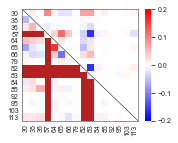

In [22]:
# heatmap of second order effects
full_mut_names = ['F30S','S35N','S36N','I57S','T64S','A65T','N66A','T79S','K82I','S83F','T84S','S85N','S92N','R95T','Y103F','Y113S']

# combine coefs into one matrix
coefs_to_plot = np.full((num_mutations_H1,num_mutations_H1),np.nan)
for i in range(num_mutations_H1):
    for j in range(i,num_mutations_H1):
        # upper diagonal H1
        coefs_to_plot[i,j] = second_coefs_H1_matrix_sigmask[i,j]
        # lower diagonal H3
        coefs_to_plot[j,i] = second_coefs_H3_matrix_sigmask[i,j]
print(np.nanmin(coefs_to_plot),np.nanmax(coefs_to_plot))

sns.set_style("white",{"axes.facecolor": "firebrick"})
plt.figure(figsize=(2.5,2))


ax = sns.heatmap(coefs_to_plot,cmap='bwr',xticklabels=mut_names,yticklabels=mut_names,vmin=-0.2,vmax=0.2,
                linewidths=0,linecolor='w')
for _, spine in ax.spines.items():
    spine.set_visible(True)
    
line = lines.Line2D([0,num_mutations_H1], [0,num_mutations_H1],
                    lw=0.5, color='black', axes=ax)
ax.add_line(line)
ax.tick_params(pad=0)
plt.xticks(rotation=90) 
plt.yticks(rotation=0) 
plt.tight_layout() #rect=[0, 0.03, 1, 0.95])
plt.savefig('images/9114_2ndorder_effects_'+ep_type+'.pdf')
plt.show()

